In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("exoplanet_clean.csv")
df.head()


,pl_name,pl_orbper,pl_rade,st_teff,st_rad,st_mass,st_met,sy_dist
0,WASP-39 b,4.055259,14.235000,5400.0,0.895000,0.930000,0.00,213.98200
1,HAT-P-1 b,4.465430,13.921578,5975.0,1.135000,1.133000,0.13,158.97900
2,HR 8799 d,37000.000000,13.000000,5550.0,0.950000,1.500000,-0.47,41.24410
3,HD 156279 b,131.050000,2.423000,5453.0,0.950000,0.930000,0.14,36.19450
4,GJ 832 b,3507.000000,2.423000,5550.0,0.441557,0.437474,0.00,4.96435


In [2]:
df.columns.tolist()


['pl_name',
 'pl_orbper',
 'pl_rade',
 'st_teff',
 'st_rad',
 'st_mass',
 'st_met',
 'sy_dist']

Correlation heatmap

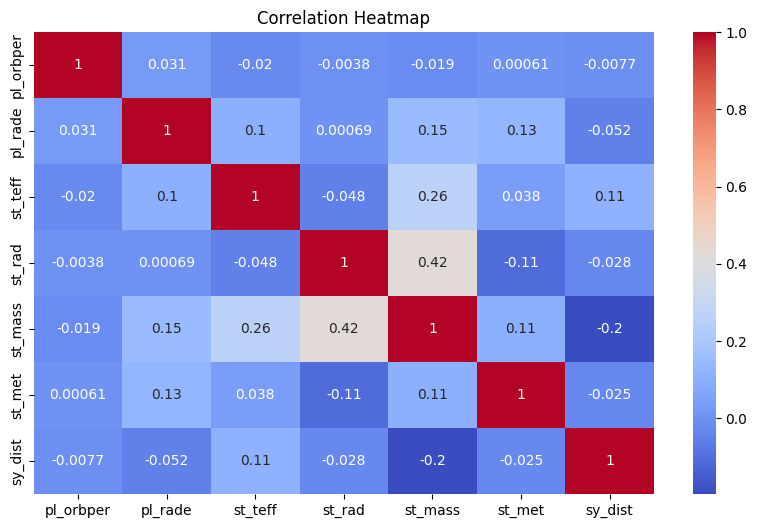

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [4]:
df.describe()


,pl_orbper,pl_rade,st_teff,st_rad,st_mass,st_met,sy_dist
count,6.053000e+03,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000
mean,6.852870e+04,3.550412,5417.791693,1.410236,0.939164,-0.008049,696.461593
std,5.168086e+06,3.800720,1363.259074,3.532364,0.379292,0.173187,1166.958142
min,9.070629e-02,0.390000,415.000000,0.012300,0.013100,-2.500000,1.301190
25%,4.688418e+00,2.180000,5035.000000,0.802000,0.810000,-0.040000,107.214000
50%,1.099470e+01,2.423000,5550.000000,0.950000,0.945000,0.000000,384.938000
75%,3.237610e+01,2.670000,5845.000000,1.167150,1.050000,0.042200,825.883000
max,4.020000e+08,77.342100,40000.000000,88.475000,10.830000,0.600000,8380.000000


Distribution plots

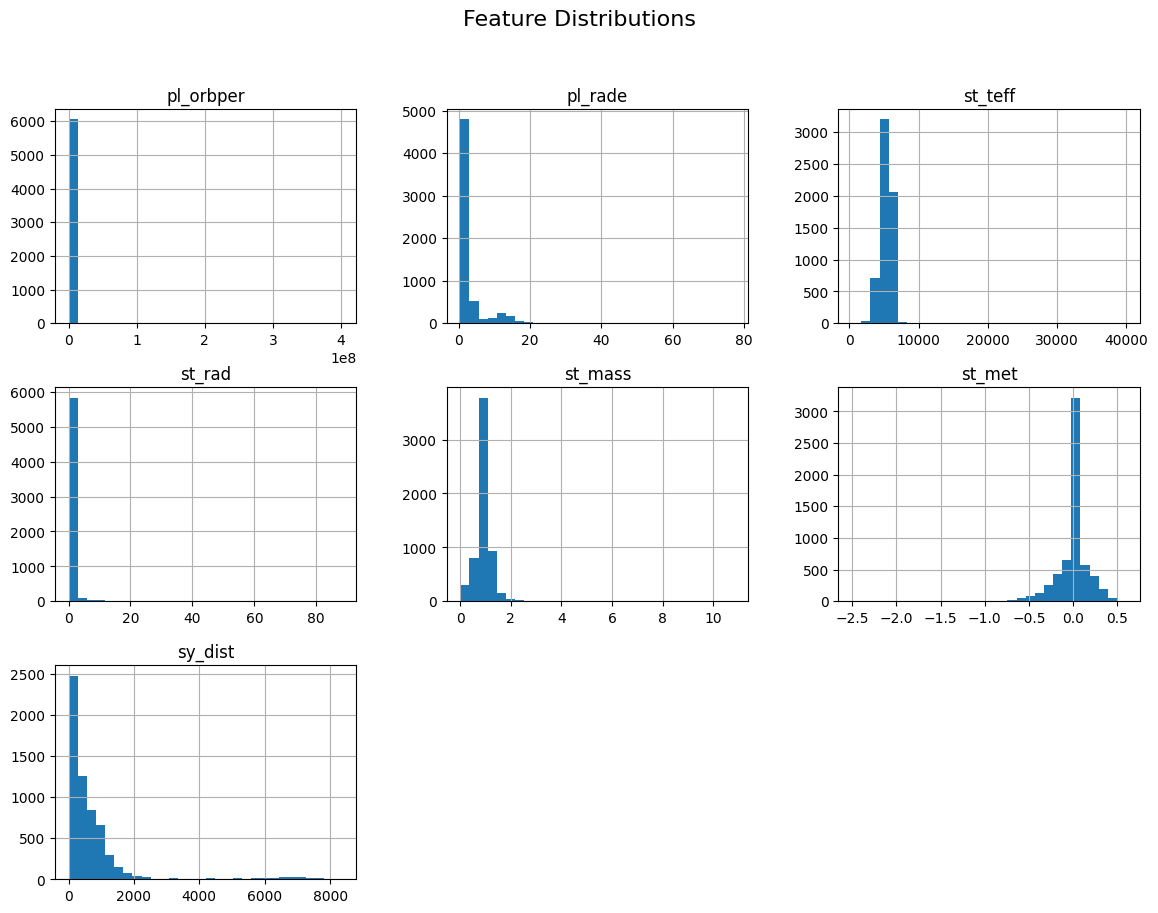

In [5]:
df.hist(figsize=(14, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

SCATTER PLOT


Planet radius vs orbital period

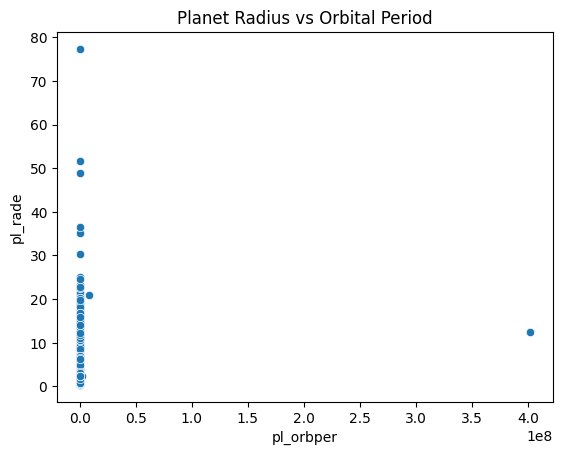

In [6]:
sns.scatterplot(data=df, x="pl_orbper", y="pl_rade")
plt.title("Planet Radius vs Orbital Period")
plt.show()


Planet radius vs star temperature

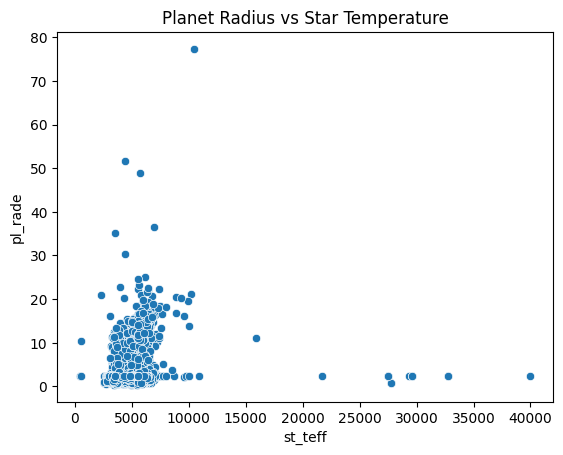

In [7]:
sns.scatterplot(data=df, x="st_teff", y="pl_rade")
plt.title("Planet Radius vs Star Temperature")
plt.show()


Planet radius vs star mass

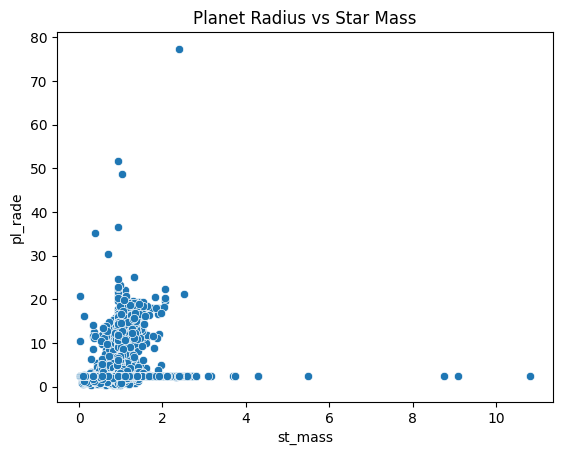

In [8]:
sns.scatterplot(data=df, x="st_mass", y="pl_rade")
plt.title("Planet Radius vs Star Mass")
plt.show()


 Distance vs orbital period


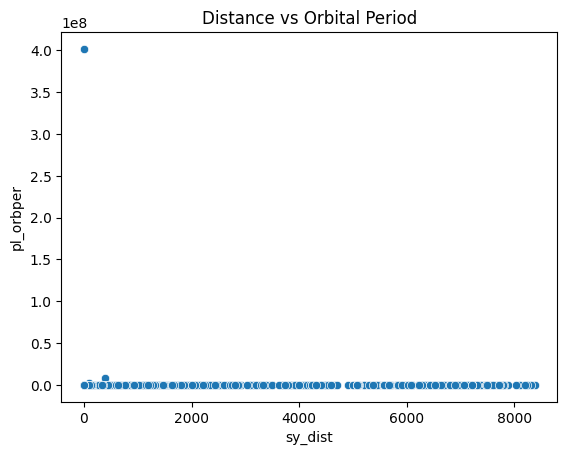

In [9]:
sns.scatterplot(data=df, x="sy_dist", y="pl_orbper")
plt.title("Distance vs Orbital Period")
plt.show()


Boxplots (Outlier detection)

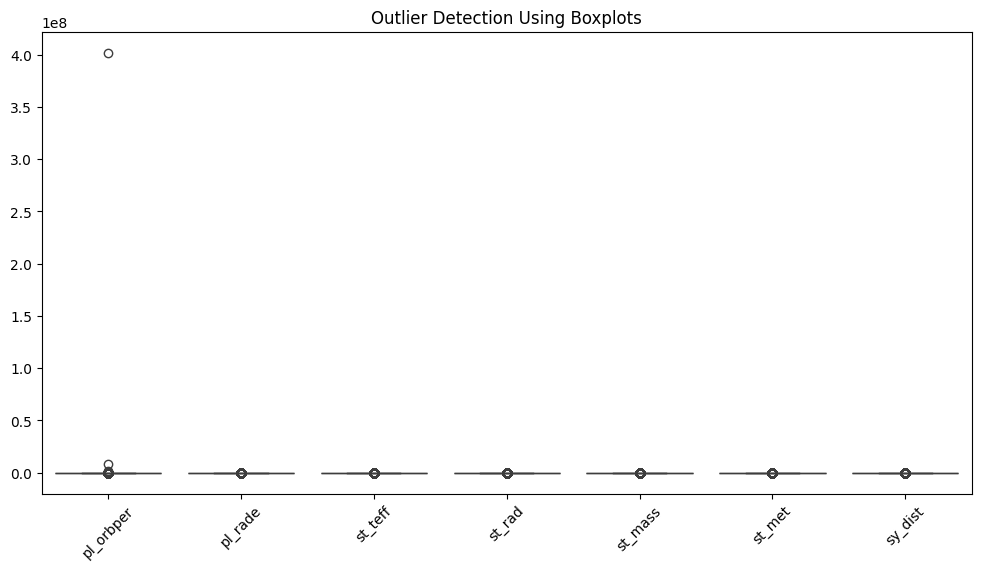

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Outlier Detection Using Boxplots")
plt.show()


Log transformation (important insight)

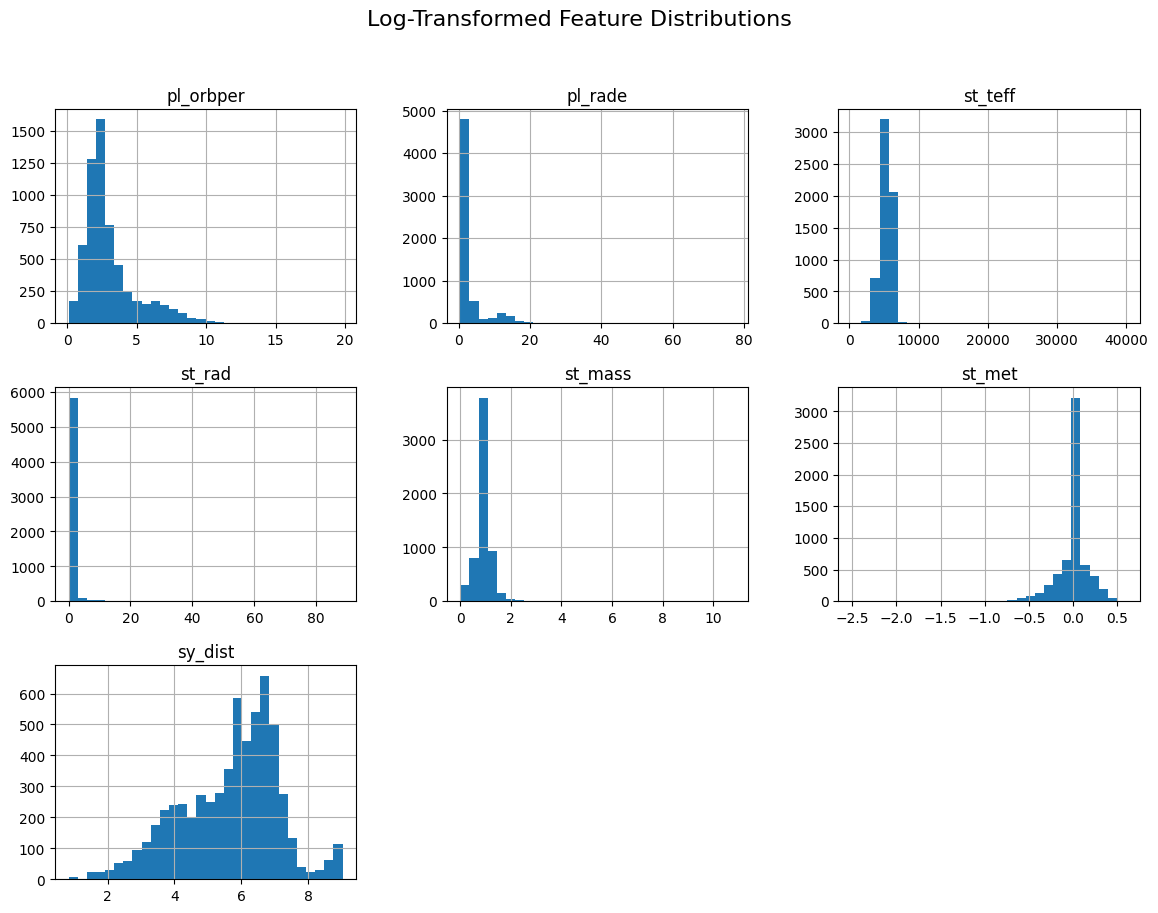

In [11]:
df_log = df.copy()

df_log["pl_orbper"] = np.log1p(df_log["pl_orbper"])
df_log["sy_dist"] = np.log1p(df_log["sy_dist"])

df_log.hist(figsize=(14, 10), bins=30)
plt.suptitle("Log-Transformed Feature Distributions", fontsize=16)
plt.show()


Simple Habitability Rule (Label Preview)

In [12]:
df["habitability_label"] = 0

# Earth-like planet size
df.loc[(df["pl_rade"] >= 0.8) & (df["pl_rade"] <= 2.5), "habitability_label"] += 1

# Sun-like star temperature
df.loc[(df["st_teff"] >= 4500) & (df["st_teff"] <= 6500), "habitability_label"] += 1

# Nearby systems
df.loc[df["sy_dist"] <= 100, "habitability_label"] += 1

df["habitability_label"].value_counts()


habitability_label
2    3162
1    1832
3     893
0     166
Name: count, dtype: int64

In [13]:
df.to_csv("exoplanet_module2_ready.csv", index=False)
